In [118]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, GlobalAveragePooling2D
from sklearn.model_selection import train_test_split

In [119]:
cqt = pd.read_pickle("C:\\Users\\ILXYENILXY\\Desktop\\Github\\[R-PJ] Sound-Classification\\cqt.pkl")
mfcc = pd.read_pickle("C:\\Users\\ILXYENILXY\\Desktop\\Github\\[R-PJ] Sound-Classification\\mfcc.pkl")

In [120]:
le = LabelEncoder()

def make_dst(target):
    target_x = np.array(target.features.tolist())
    target_x = np.expand_dims(target_x, -1)
    target_y = np.array(target.label.tolist())
    target_yy = to_categorical(le.fit_transform(target_y))

    x_train, x_test, y_train, y_test = train_test_split(target_x, target_yy, test_size=0.3)
    
    return x_train, x_test, y_train, y_test

cqt_x_train, cqt_x_test, cqt_y_train, cqt_y_test = make_dst(cqt)
mfcc_x_train, mfcc_x_test, mfcc_y_train, mfcc_y_test = make_dst(mfcc)

print(cqt_x_train.shape, cqt_x_test.shape)
print(cqt_y_train.shape, cqt_y_test.shape)
print(mfcc_x_train.shape, mfcc_x_test.shape)
print(mfcc_y_train.shape, mfcc_y_test.shape)

(1400, 168, 108, 1) (600, 168, 108, 1)
(1400, 50) (600, 50)
(1400, 40, 216, 1) (600, 40, 216, 1)
(1400, 50) (600, 50)


In [129]:
def model_eval(model, target_x_test, target_y_test):
    target_result = model.evaluate(target_x_test, target_y_test)
    print('Loss, Accuracy', target_result)

In [122]:
def cqt_model():
    model = Sequential()

    model.add(Conv2D(64, (3,3), activation='relu', input_shape=(168, 108, 1)))
    model.add(MaxPooling2D(2))
    model.add(Conv2D(128, (3,3), activation='relu'))
    model.add(MaxPooling2D(2))
    model.add(Dropout(0.5))
    model.add(Conv2D(256, (3,3), activation='relu'))
    model.add(MaxPooling2D(2))

    model.add(GlobalAveragePooling2D())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(50, activation='softmax'))

    model.compile(optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['acc'])
     
    return model

model_cqt = cqt_model()
model_cqt.summary()

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_120 (Conv2D)          (None, 166, 106, 64)      640       
_________________________________________________________________
max_pooling2d_120 (MaxPoolin (None, 83, 53, 64)        0         
_________________________________________________________________
conv2d_121 (Conv2D)          (None, 81, 51, 128)       73856     
_________________________________________________________________
max_pooling2d_121 (MaxPoolin (None, 40, 25, 128)       0         
_________________________________________________________________
dropout_80 (Dropout)         (None, 40, 25, 128)       0         
_________________________________________________________________
conv2d_122 (Conv2D)          (None, 38, 23, 256)       295168    
_________________________________________________________________
max_pooling2d_122 (MaxPoolin (None, 19, 11, 256)     

In [123]:
cqt_hist = model_cqt.fit(cqt_x_train, cqt_y_train, epochs=100, batch_size=128, validation_data=(cqt_x_test, cqt_y_test))

Epoch 1/100
11/11 [==============================] - 3s 207ms/step - loss: 3.8793 - acc: 0.0207 - val_loss: 3.8397 - val_acc: 0.0200
Epoch 2/100
11/11 [==============================] - 2s 186ms/step - loss: 3.8033 - acc: 0.0293 - val_loss: 3.7879 - val_acc: 0.0267
Epoch 3/100
11/11 [==============================] - 2s 188ms/step - loss: 3.7640 - acc: 0.0400 - val_loss: 3.7422 - val_acc: 0.0417
Epoch 4/100
11/11 [==============================] - 2s 190ms/step - loss: 3.6850 - acc: 0.0543 - val_loss: 3.6075 - val_acc: 0.0517
Epoch 5/100
11/11 [==============================] - 2s 190ms/step - loss: 3.5149 - acc: 0.0750 - val_loss: 3.4434 - val_acc: 0.0633
Epoch 6/100
11/11 [==============================] - 2s 189ms/step - loss: 3.3768 - acc: 0.0750 - val_loss: 3.3101 - val_acc: 0.1000
Epoch 7/100
11/11 [==============================] - 2s 190ms/step - loss: 3.2431 - acc: 0.1107 - val_loss: 3.2414 - val_acc: 0.0933
Epoch 8/100
11/11 [==============================] - 2s 188ms/step - 

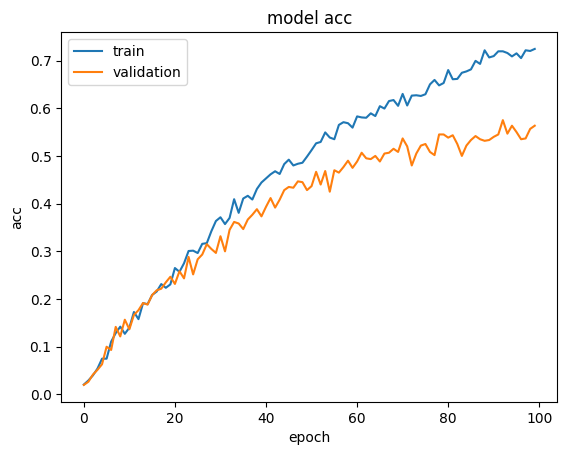

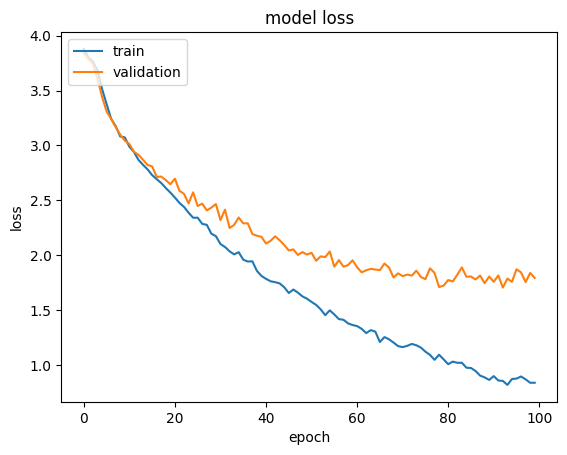

In [124]:
plt.plot(cqt_hist.history['acc'])
plt.plot(cqt_hist.history['val_acc'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(cqt_hist.history['loss'])
plt.plot(cqt_hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


In [130]:
model_eval(model_cqt, cqt_x_test, cqt_y_test)

19/19 [==============================] - 1s 32ms/step - loss: 1.7933 - acc: 0.5633
Loss, Accuracy [1.793260931968689, 0.5633333325386047]


In [125]:
def mfcc_model():
    model = Sequential()

    model.add(Conv2D(64, (3,3), activation='relu', input_shape=(40, 216, 1)))
    model.add(MaxPooling2D(2))
    model.add(Conv2D(128, (3,3), activation='relu'))
    model.add(MaxPooling2D(2))
    model.add(Dropout(0.5))
    model.add(Conv2D(256, (3,3), activation='relu'))
    model.add(MaxPooling2D(2))

    model.add(GlobalAveragePooling2D())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(50, activation='softmax'))

    model.compile(optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['acc'])
     
    return model

model_mfcc = mfcc_model()
model_mfcc.summary()

Model: "sequential_41"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_123 (Conv2D)          (None, 38, 214, 64)       640       
_________________________________________________________________
max_pooling2d_123 (MaxPoolin (None, 19, 107, 64)       0         
_________________________________________________________________
conv2d_124 (Conv2D)          (None, 17, 105, 128)      73856     
_________________________________________________________________
max_pooling2d_124 (MaxPoolin (None, 8, 52, 128)        0         
_________________________________________________________________
dropout_82 (Dropout)         (None, 8, 52, 128)        0         
_________________________________________________________________
conv2d_125 (Conv2D)          (None, 6, 50, 256)        295168    
_________________________________________________________________
max_pooling2d_125 (MaxPoolin (None, 3, 25, 256)      

In [126]:
mfcc_hist = model_mfcc.fit(mfcc_x_train, mfcc_y_train, epochs=100, batch_size=128, validation_data=(mfcc_x_test,mfcc_y_test))

Epoch 1/100
11/11 [==============================] - 5s 274ms/step - loss: 3.9110 - acc: 0.0171 - val_loss: 3.8847 - val_acc: 0.0100
Epoch 2/100
11/11 [==============================] - 1s 86ms/step - loss: 3.8390 - acc: 0.0264 - val_loss: 3.7991 - val_acc: 0.0350
Epoch 3/100
11/11 [==============================] - 1s 86ms/step - loss: 3.7107 - acc: 0.0436 - val_loss: 3.6538 - val_acc: 0.0567
Epoch 4/100
11/11 [==============================] - 1s 86ms/step - loss: 3.5603 - acc: 0.0536 - val_loss: 3.5041 - val_acc: 0.0883
Epoch 5/100
11/11 [==============================] - 1s 86ms/step - loss: 3.4642 - acc: 0.0600 - val_loss: 3.4423 - val_acc: 0.0917
Epoch 6/100
11/11 [==============================] - 1s 86ms/step - loss: 3.3672 - acc: 0.0907 - val_loss: 3.2866 - val_acc: 0.1250
Epoch 7/100
11/11 [==============================] - 1s 85ms/step - loss: 3.2316 - acc: 0.1221 - val_loss: 3.1735 - val_acc: 0.1717
Epoch 8/100
11/11 [==============================] - 1s 80ms/step - loss: 3

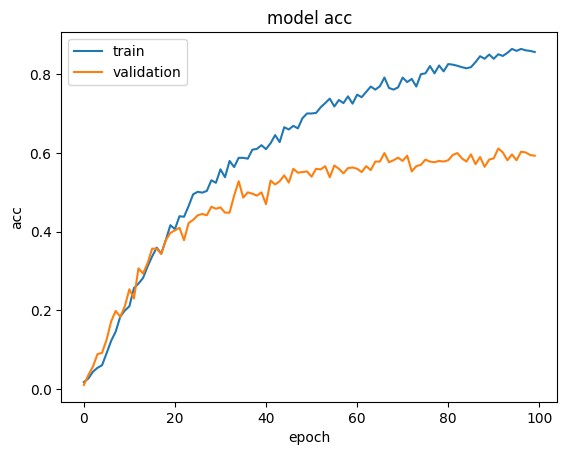

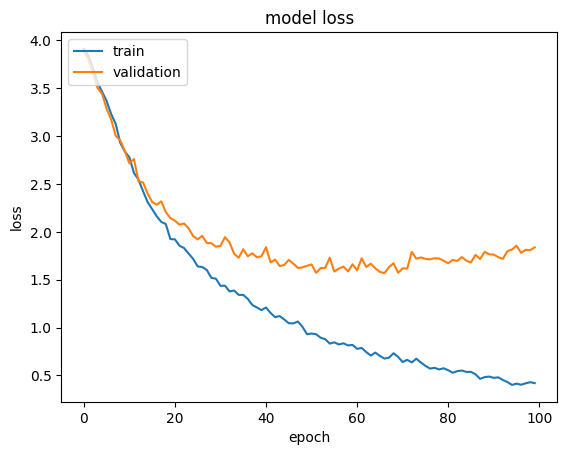

In [127]:
plt.plot(mfcc_hist.history['acc'])
plt.plot(mfcc_hist.history['val_acc'])
plt.title('model acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(mfcc_hist.history['loss'])
plt.plot(mfcc_hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [132]:
model_eval(model_mfcc, mfcc_x_test, mfcc_y_test)

19/19 [==============================] - 1s 20ms/step - loss: 1.8378 - acc: 0.5933
Loss, Accuracy [1.837829351425171, 0.5933333039283752]
